In [24]:
%load_ext autoreload
%autoreload 2
import os
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=120

from exact import mag_map_exact
from pure_shear import mag_map_shear

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Note: this implementation has not been fully optimized, and is primarily for the purpose of experimentation and reproduction of results in Zhang 2022 ("Analytic Simplifications to Planetary Microlensing under the Generalized Perturbative Picture").

## Exact semi-analytic solution

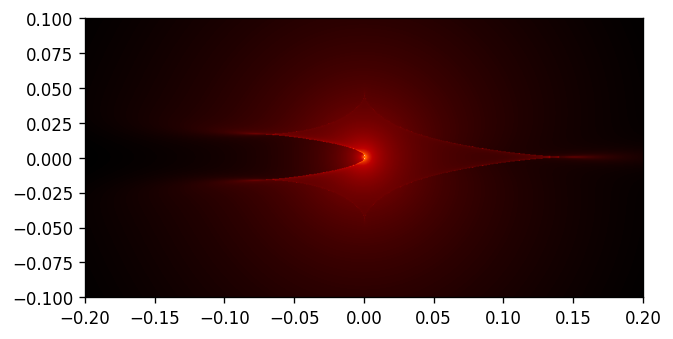

In [25]:
# use print_time = True in exact.py to print timing
x_grid, y_grid = np.linspace(-0.2,0.2,500), np.linspace(-0.1,0.1,500)
result = mag_map_exact(1, 1e-3, x_grid, y_grid, laguerre=True)
plt.imshow(np.log10(result), cmap='gist_heat', extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()))

In [26]:
%timeit mag_map_exact(1/1.1, 1e-3, x_grid, y_grid, laguerre=True)
%timeit mag_map_exact(1, 1e-3, x_grid, y_grid, laguerre=True)
%timeit mag_map_exact(1.1, 1e-3, x_grid, y_grid, laguerre=True)

651 ms ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
635 ms ± 4.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
644 ms ± 18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
# newton's method
%timeit mag_map_exact(1/1.1, 1e-3, x_grid, y_grid, laguerre=False)
%timeit mag_map_exact(1, 1e-3, x_grid, y_grid, laguerre=False)
%timeit mag_map_exact(1.1, 1e-3, x_grid, y_grid, laguerre=False)

619 ms ± 5.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
615 ms ± 4.46 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
618 ms ± 3.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


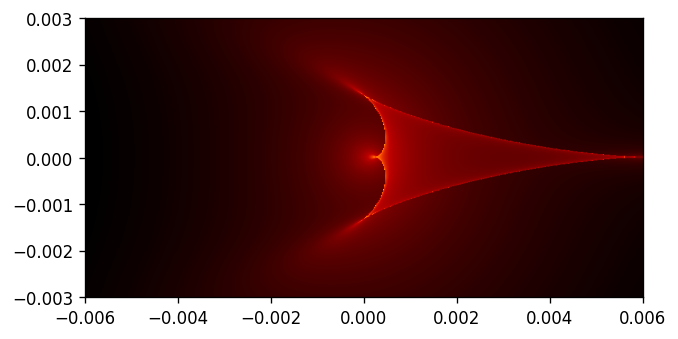

In [28]:
x_grid, y_grid = np.linspace(-0.006,0.006,500), np.linspace(-0.003,0.003,500)
result = mag_map_exact(1.5, 1e-3, x_grid, y_grid, laguerre=True)
plt.imshow(np.log10(result), cmap='gist_heat', extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()))

In [29]:
%timeit mag_map_exact(1, 1e-3, x_grid, y_grid, laguerre=True)
%timeit mag_map_exact(1.5, 1e-3, x_grid, y_grid, laguerre=True)
%timeit mag_map_exact(2, 1e-3, x_grid, y_grid, laguerre=True)

695 ms ± 17.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
676 ms ± 19.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
664 ms ± 4.71 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
# newton's method
%timeit mag_map_exact(1, 1e-3, x_grid, y_grid, laguerre=False)
%timeit mag_map_exact(1.5, 1e-3, x_grid, y_grid, laguerre=False)
%timeit mag_map_exact(2, 1e-3, x_grid, y_grid, laguerre=False)

740 ms ± 19.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
721 ms ± 6.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
718 ms ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


let's also test binary-mass ratios

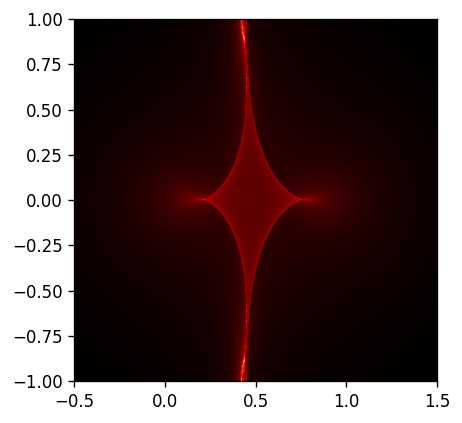

In [31]:
x_grid, y_grid = np.linspace(-0.5,1.5,500), np.linspace(-1,1,500)
result = mag_map_exact(1, 0.9, x_grid, y_grid, laguerre=True)
plt.imshow(np.log10(result), cmap='gist_heat', extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()))

In [32]:
%timeit mag_map_exact(1, 0.9, x_grid, y_grid, laguerre=True)

953 ms ± 28.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%timeit mag_map_exact(1, 0.9, x_grid, y_grid, laguerre=False)

999 ms ± 6.13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Pure-shear (approximate analytic)

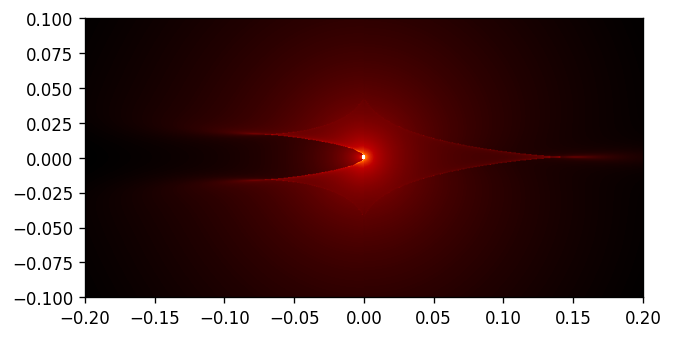

In [34]:
x_grid, y_grid = np.linspace(-0.2,0.2,500), np.linspace(-0.1,0.1,500)
result = mag_map_shear(1, 1e-3, x_grid, y_grid)
plt.imshow(np.log10(result), cmap='gist_heat', extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()))

note: the bright feature at the center is caused by a negative magnification artifact (see Section 3 of Zhang 2022)

In [35]:
%timeit mag_map_shear(1, 1e-3, x_grid, y_grid)

233 ms ± 7.74 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
